# KMeans Algorithm

In [1]:
import pandas as pd

from sklearn.preprocessing import RobustScaler, StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import pairwise_distances
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go

## Data Loading

In [2]:
# Importing the CSV file

url = "https://drive.google.com/file/d/1w0pfjw1AJfQ6XT9YPsRO8AlcH-ARlP18/view?usp=sharing"
path = "https://drive.google.com/uc?export=download&id="+url.split("/")[-2]
songs5000_df = pd.read_csv(path)
songs5000_df

,Unnamed: 0,name,artist,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,duration_ms,time_signature,id,html
0,0,Se Eu Quiser Falar Com Deus ...,Gilberto Gil,0.6580,0.25900,11,-13.141,0,0.0705,0.694,0.000059,0.9750,0.3060,110.376,,256213,4,1n7JnwviZ7zf0LR1tcGFq7,https://open.spotify.com/track/1n7JnwviZ7zf0LR...
1,1,Saudade De Bahia ...,Antônio Carlos Jobim,0.7420,0.39900,2,-12.646,1,0.0346,0.217,0.000002,0.1070,0.6930,125.039,,191867,4,5QGM1U0eCYrQuwSJwTm5Zq,https://open.spotify.com/track/5QGM1U0eCYrQuwS...
2,2,"Canta Canta, Minha Gente ...",Martinho Da Vila,0.8510,0.73000,2,-11.048,1,0.3470,0.453,0.000063,0.1240,0.9050,93.698,,152267,4,0NLIFSZxPzQhCwnkn5PJYs,https://open.spotify.com/track/0NLIFSZxPzQhCwn...
3,3,Mulher Eu Sei ...,Chico César,0.7050,0.05020,4,-18.115,1,0.0471,0.879,0.000041,0.3860,0.5240,106.802,,186227,4,3mXqOdlLE1k67WsAxryPFs,https://open.spotify.com/track/3mXqOdlLE1k67Ws...
4,4,Rosa Morena ...,Kurt Elling,0.6510,0.11900,6,-19.807,1,0.0380,0.916,0.000343,0.1040,0.4020,120.941,,273680,4,7bSzjzjTkWT2CkIPPdp0eA,https://open.spotify.com/track/7bSzjzjTkWT2CkI...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5230,5230,"1812 Festival Overture, Op. 49: 1812 Overture,...",Pyotr Ilyich Tchaikovsky,0.2020,0.06940,3,-23.390,1,0.0473,0.917,0.715000,0.0832,0.0655,87.906,,995000,4,1aEhYlZtypmipA06SDJ4U3,https://open.spotify.com/track/1aEhYlZtypmipA0...
5231,5231,"Winter Fragments pour ensemble instrumental, s...",Tristan Murail,0.1880,0.10100,6,-21.873,1,0.0442,0.855,0.426000,0.0694,0.0355,83.134,,855000,4,1Gfqe7TAKklmuZf6hxsH6h,https://open.spotify.com/track/1Gfqe7TAKklmuZf...
5232,5232,"Schoenberg: 5 Orchestral Pieces, Op. 16: No. 3...",Arnold Schoenberg,0.0596,0.00093,9,-42.959,1,0.0434,0.951,0.969000,0.0772,0.0344,71.573,,238187,3,2XNwnFrdMDpismp0VUZ7cU,https://open.spotify.com/track/2XNwnFrdMDpismp...
5233,5233,"Serenade For Strings In E, Op.22, B. 52: 1. Mo...",Antonín Dvořák,0.1330,0.02080,4,-29.443,1,0.0419,0.883,0.505000,0.1110,0.0591,67.109,,314307,4,7ucDwgMtE3YJtEfTbuRhy0,https://open.spotify.com/track/7ucDwgMtE3YJtEf...


## Data Cleaning

In [3]:
print(songs5000_df.columns)

Index(['Unnamed: 0',
       'name                                                                                                                                                                             ',
       'artist                                          ', 'danceability ',
       'energy   ', 'key ', 'loudness ', 'mode ', 'speechiness ',
       'acousticness ', 'instrumentalness ', 'liveness ', 'valence ',
       'tempo   ', 'type ', 'duration_ms ', 'time_signature ',
       'id                     ', 'html'],
      dtype='object')


In [4]:
songs5000_df.columns = songs5000_df.columns.str.strip()

In [5]:
print(songs5000_df.columns)

Index(['Unnamed: 0', 'name', 'artist', 'danceability', 'energy', 'key',
       'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo', 'type', 'duration_ms', 'time_signature',
       'id', 'html'],
      dtype='object')


In [6]:
songs5000_df = songs5000_df.drop(columns = ["Unnamed: 0", "artist", "time_signature", "id", "html", "key", "mode"])

In [7]:
songs5000_df

,name,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,duration_ms
0,Se Eu Quiser Falar Com Deus ...,0.6580,0.25900,-13.141,0.0705,0.694,0.000059,0.9750,0.3060,110.376,,256213
1,Saudade De Bahia ...,0.7420,0.39900,-12.646,0.0346,0.217,0.000002,0.1070,0.6930,125.039,,191867
2,"Canta Canta, Minha Gente ...",0.8510,0.73000,-11.048,0.3470,0.453,0.000063,0.1240,0.9050,93.698,,152267
3,Mulher Eu Sei ...,0.7050,0.05020,-18.115,0.0471,0.879,0.000041,0.3860,0.5240,106.802,,186227
4,Rosa Morena ...,0.6510,0.11900,-19.807,0.0380,0.916,0.000343,0.1040,0.4020,120.941,,273680
...,...,...,...,...,...,...,...,...,...,...,...,...
5230,"1812 Festival Overture, Op. 49: 1812 Overture,...",0.2020,0.06940,-23.390,0.0473,0.917,0.715000,0.0832,0.0655,87.906,,995000
5231,"Winter Fragments pour ensemble instrumental, s...",0.1880,0.10100,-21.873,0.0442,0.855,0.426000,0.0694,0.0355,83.134,,855000
5232,"Schoenberg: 5 Orchestral Pieces, Op. 16: No. 3...",0.0596,0.00093,-42.959,0.0434,0.951,0.969000,0.0772,0.0344,71.573,,238187
5233,"Serenade For Strings In E, Op.22, B. 52: 1. Mo...",0.1330,0.02080,-29.443,0.0419,0.883,0.505000,0.1110,0.0591,67.109,,314307


In [8]:
songs5000_df = songs5000_df.drop(columns = ["type", "duration_ms"])
songs5000_df

,name,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,Se Eu Quiser Falar Com Deus ...,0.6580,0.25900,-13.141,0.0705,0.694,0.000059,0.9750,0.3060,110.376
1,Saudade De Bahia ...,0.7420,0.39900,-12.646,0.0346,0.217,0.000002,0.1070,0.6930,125.039
2,"Canta Canta, Minha Gente ...",0.8510,0.73000,-11.048,0.3470,0.453,0.000063,0.1240,0.9050,93.698
3,Mulher Eu Sei ...,0.7050,0.05020,-18.115,0.0471,0.879,0.000041,0.3860,0.5240,106.802
4,Rosa Morena ...,0.6510,0.11900,-19.807,0.0380,0.916,0.000343,0.1040,0.4020,120.941
...,...,...,...,...,...,...,...,...,...,...
5230,"1812 Festival Overture, Op. 49: 1812 Overture,...",0.2020,0.06940,-23.390,0.0473,0.917,0.715000,0.0832,0.0655,87.906
5231,"Winter Fragments pour ensemble instrumental, s...",0.1880,0.10100,-21.873,0.0442,0.855,0.426000,0.0694,0.0355,83.134
5232,"Schoenberg: 5 Orchestral Pieces, Op. 16: No. 3...",0.0596,0.00093,-42.959,0.0434,0.951,0.969000,0.0772,0.0344,71.573
5233,"Serenade For Strings In E, Op.22, B. 52: 1. Mo...",0.1330,0.02080,-29.443,0.0419,0.883,0.505000,0.1110,0.0591,67.109


In [9]:
songs5000_df = songs5000_df.drop(columns = ["liveness"])
songs5000_df

,name,danceability,energy,loudness,speechiness,acousticness,instrumentalness,valence,tempo
0,Se Eu Quiser Falar Com Deus ...,0.6580,0.25900,-13.141,0.0705,0.694,0.000059,0.3060,110.376
1,Saudade De Bahia ...,0.7420,0.39900,-12.646,0.0346,0.217,0.000002,0.6930,125.039
2,"Canta Canta, Minha Gente ...",0.8510,0.73000,-11.048,0.3470,0.453,0.000063,0.9050,93.698
3,Mulher Eu Sei ...,0.7050,0.05020,-18.115,0.0471,0.879,0.000041,0.5240,106.802
4,Rosa Morena ...,0.6510,0.11900,-19.807,0.0380,0.916,0.000343,0.4020,120.941
...,...,...,...,...,...,...,...,...,...
5230,"1812 Festival Overture, Op. 49: 1812 Overture,...",0.2020,0.06940,-23.390,0.0473,0.917,0.715000,0.0655,87.906
5231,"Winter Fragments pour ensemble instrumental, s...",0.1880,0.10100,-21.873,0.0442,0.855,0.426000,0.0355,83.134
5232,"Schoenberg: 5 Orchestral Pieces, Op. 16: No. 3...",0.0596,0.00093,-42.959,0.0434,0.951,0.969000,0.0344,71.573
5233,"Serenade For Strings In E, Op.22, B. 52: 1. Mo...",0.1330,0.02080,-29.443,0.0419,0.883,0.505000,0.0591,67.109


In [10]:
songs5000_df = songs5000_df.set_index("name")
songs5000_df

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,valence,tempo
name,,,,,,,,
Se Eu Quiser Falar Com Deus,0.6580,0.25900,-13.141,0.0705,0.694,0.000059,0.3060,110.376
Saudade De Bahia,0.7420,0.39900,-12.646,0.0346,0.217,0.000002,0.6930,125.039
"Canta Canta, Minha Gente",0.8510,0.73000,-11.048,0.3470,0.453,0.000063,0.9050,93.698
Mulher Eu Sei,0.7050,0.05020,-18.115,0.0471,0.879,0.000041,0.5240,106.802
Rosa Morena,0.6510,0.11900,-19.807,0.0380,0.916,0.000343,0.4020,120.941
...,...,...,...,...,...,...,...,...
"1812 Festival Overture, Op. 49: 1812 Overture, Op. 49",0.2020,0.06940,-23.390,0.0473,0.917,0.715000,0.0655,87.906
"Winter Fragments pour ensemble instrumental, sons de synthèse et dispositif électronique",0.1880,0.10100,-21.873,0.0442,0.855,0.426000,0.0355,83.134
"Schoenberg: 5 Orchestral Pieces, Op. 16: No. 3 Farben (Colours)",0.0596,0.00093,-42.959,0.0434,0.951,0.969000,0.0344,71.573


Finding the outliers

In [11]:
def count_outliers(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower_limit = Q1 -1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR
    return ((series < lower_limit) | (series > upper_limit)).sum()
columns = ['danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'valence', 'tempo']

# Number of outliers for each feature
outliers_count = {column: count_outliers(songs5000_df[column]) for column in columns}
outliers_count # This is to see how many outliers there are within each feature

{'danceability': 0,
 'energy': 0,
 'loudness': 355,
 'speechiness': 437,
 'acousticness': 0,
 'instrumentalness': 0,
 'valence': 0,
 'tempo': 51}

- Highest number of outliers are in the columns loudness and speechiness

- We can group them together and drop them

In [12]:
def find_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] < lower_bound) | (df[column] > upper_bound)]
# Outliers for specific feature
loudness_outliers = find_outliers(songs5000_df, 'loudness')
speechiness_outliers = find_outliers(songs5000_df, 'speechiness')
tempo_outliers = find_outliers(songs5000_df, 'tempo') # This is then grouping them and also creating the potential playlist

In [13]:
all_outliers = pd.concat([loudness_outliers, speechiness_outliers])
unique_outliers = all_outliers.loc[all_outliers.index.drop_duplicates()]
filtered_5000_df = songs5000_df.drop(index=unique_outliers.index) # This is then dropping them

In [14]:
filtered_5000_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4421 entries, Se Eu Quiser Falar Com Deus                                                                                                                                                       to Don Giovanni, K.527: Overture                                                                                                                                                  
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   danceability      4421 non-null   float64
 1   energy            4421 non-null   float64
 2   loudness          4421 non-null   float64
 3   speechiness       4421 non-null   float64
 4   acousticness      4421 non-null   float64
 5   instrumentalness  4421 non-null   float64
 6   valence           4421 non-null   float64
 7   tempo             4421 non-null   float64
dtypes: float64(8)
memory usage: 310.9+ KB


In [15]:
filtered_5000_df.describe()

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,valence,tempo
count,4421.000000,4421.000000,4421.000000,4421.000000,4421.000000,4421.000000,4421.000000,4421.000000
mean,0.520532,0.688341,-8.242125,0.067469,0.251845,0.229101,0.464197,119.884492
std,0.210794,0.253261,4.134577,0.038285,0.326832,0.352885,0.272717,26.831473
min,0.061600,0.013100,-20.445000,0.022600,0.000000,0.000000,0.022100,52.789000
25%,0.329000,0.532000,-10.434000,0.037800,0.001370,0.000001,0.227000,98.955000
50%,0.552000,0.757000,-7.201000,0.053900,0.071700,0.001080,0.439000,120.021000
75%,0.690000,0.900000,-5.195000,0.087000,0.432000,0.464000,0.698000,133.837000
max,0.967000,1.000000,1.342000,0.188000,0.995000,0.972000,0.985000,213.990000


## Data Scaling

- We can notice the variance in the columns tempo and loudness is high. Hence we need to scale the dataframe to avoid these columns dominating the cluster output. In this case I have selected robust scalar.

### Using robust scalar

In [16]:
scaler = RobustScaler().set_output(transform="pandas")

# Scale the songs5000 DataFrame
with_robust = scaler.fit_transform(filtered_5000_df)

In [17]:
songs_5000_scaled = with_robust

comparing scaled DF with the OG DF

In [18]:
pd.DataFrame({
    'original': filtered_5000_df.iloc[:,-1],
    'robust_scale': songs_5000_scaled.iloc[:,-1]
}).sort_values(by='original')

,original,robust_scale
name,,
Lazy Afternoon,52.789,-1.927412
"He's Younger Than You Are - From ""Alfie"" Score",57.312,-1.797747
Aries,58.587,-1.761195
Both Sides Now,58.686,-1.758357
I'll Never Smile Again,59.991,-1.720945
...,...,...
Chorando Baixinho,205.863,2.460925
(Sittin' On) the Dock of the Bay,205.981,2.464308
Rebel Rouser,206.313,2.473826


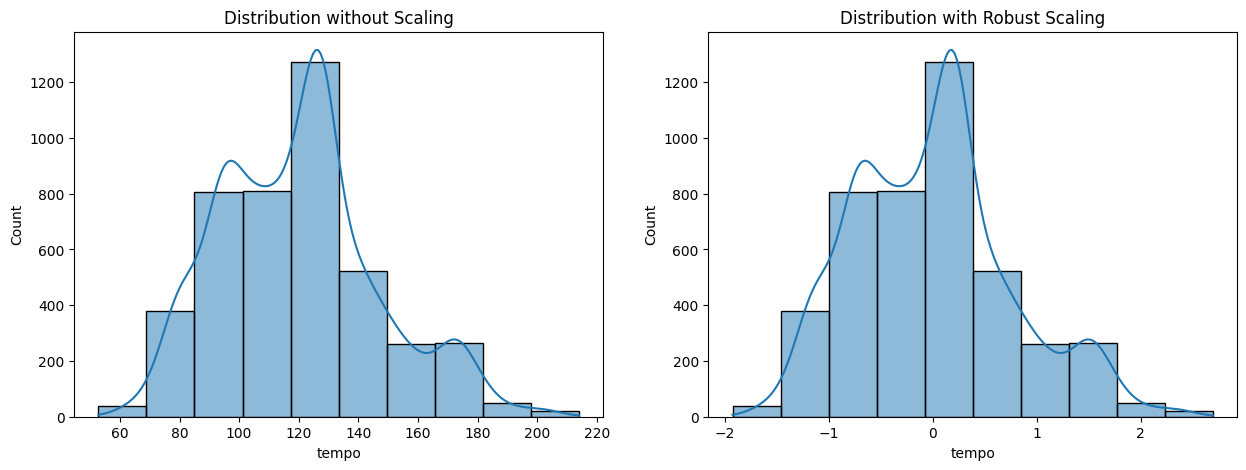

In [19]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Plotting the two plots
sns.histplot(data=filtered_5000_df.iloc[:,-1], bins=10, kde=True, ax=ax1);
sns.histplot(songs_5000_scaled.iloc[:,-1], bins=10, kde=True, ax=ax2);

# Adding titles to the plots
ax1.set_title('Distribution without Scaling')
ax2.set_title('Distribution with Robust Scaling')

plt.show()

- We can notice the range has changed after scaling without changing the distribution

### Using Standard Scaler

In [20]:
scaler = StandardScaler().set_output(transform='pandas')
with_standard = scaler.fit_transform(filtered_5000_df)

In [21]:
songs_5000_std_scaled = with_standard

In [22]:
pd.DataFrame({
    'original': filtered_5000_df.iloc[:,-1],
    'standard_scale': songs_5000_std_scaled.iloc[:,-1]
}).sort_values(by='original')

,original,standard_scale
name,,
Lazy Afternoon,52.789,-2.500909
"He's Younger Than You Are - From ""Alfie"" Score",57.312,-2.332320
Aries,58.587,-2.284795
Both Sides Now,58.686,-2.281105
I'll Never Smile Again,59.991,-2.232463
...,...,...
Chorando Baixinho,205.863,3.204753
(Sittin' On) the Dock of the Bay,205.981,3.209151
Rebel Rouser,206.313,3.221526


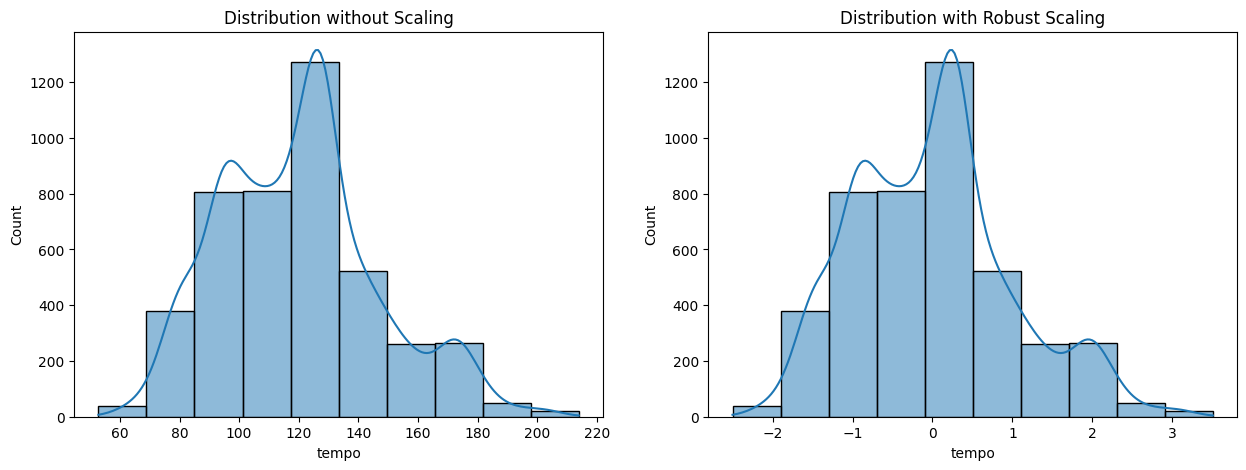

In [23]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Plotting the two plots
sns.histplot(data=filtered_5000_df.iloc[:,-1], bins=10, kde=True, ax=ax1);
sns.histplot(songs_5000_std_scaled.iloc[:,-1], bins=10, kde=True, ax=ax2);

# Adding titles to the plots
ax1.set_title('Distribution without Scaling')
ax2.set_title('Distribution with Robust Scaling')

plt.show()

- To check the distances, I decided to take out sample of 10 songs from both the scaled dataframes and plot the heatmap

In [24]:
sample_5000 = filtered_5000_df.sample(10)

In [25]:
robust_sample = songs_5000_scaled.sample(10)

/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:61: UserWarning:

constrained_layout not applied because axes sizes collapsed to zero.  Try making figure larger or axes decorations smaller.

/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:61: UserWarning:

constrained_layout not applied because axes sizes collapsed to zero.  Try making figure larger or axes decorations smaller.

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

constrained_layout not applied because axes sizes collapsed to zero.  Try making figure larger or axes decorations smaller.



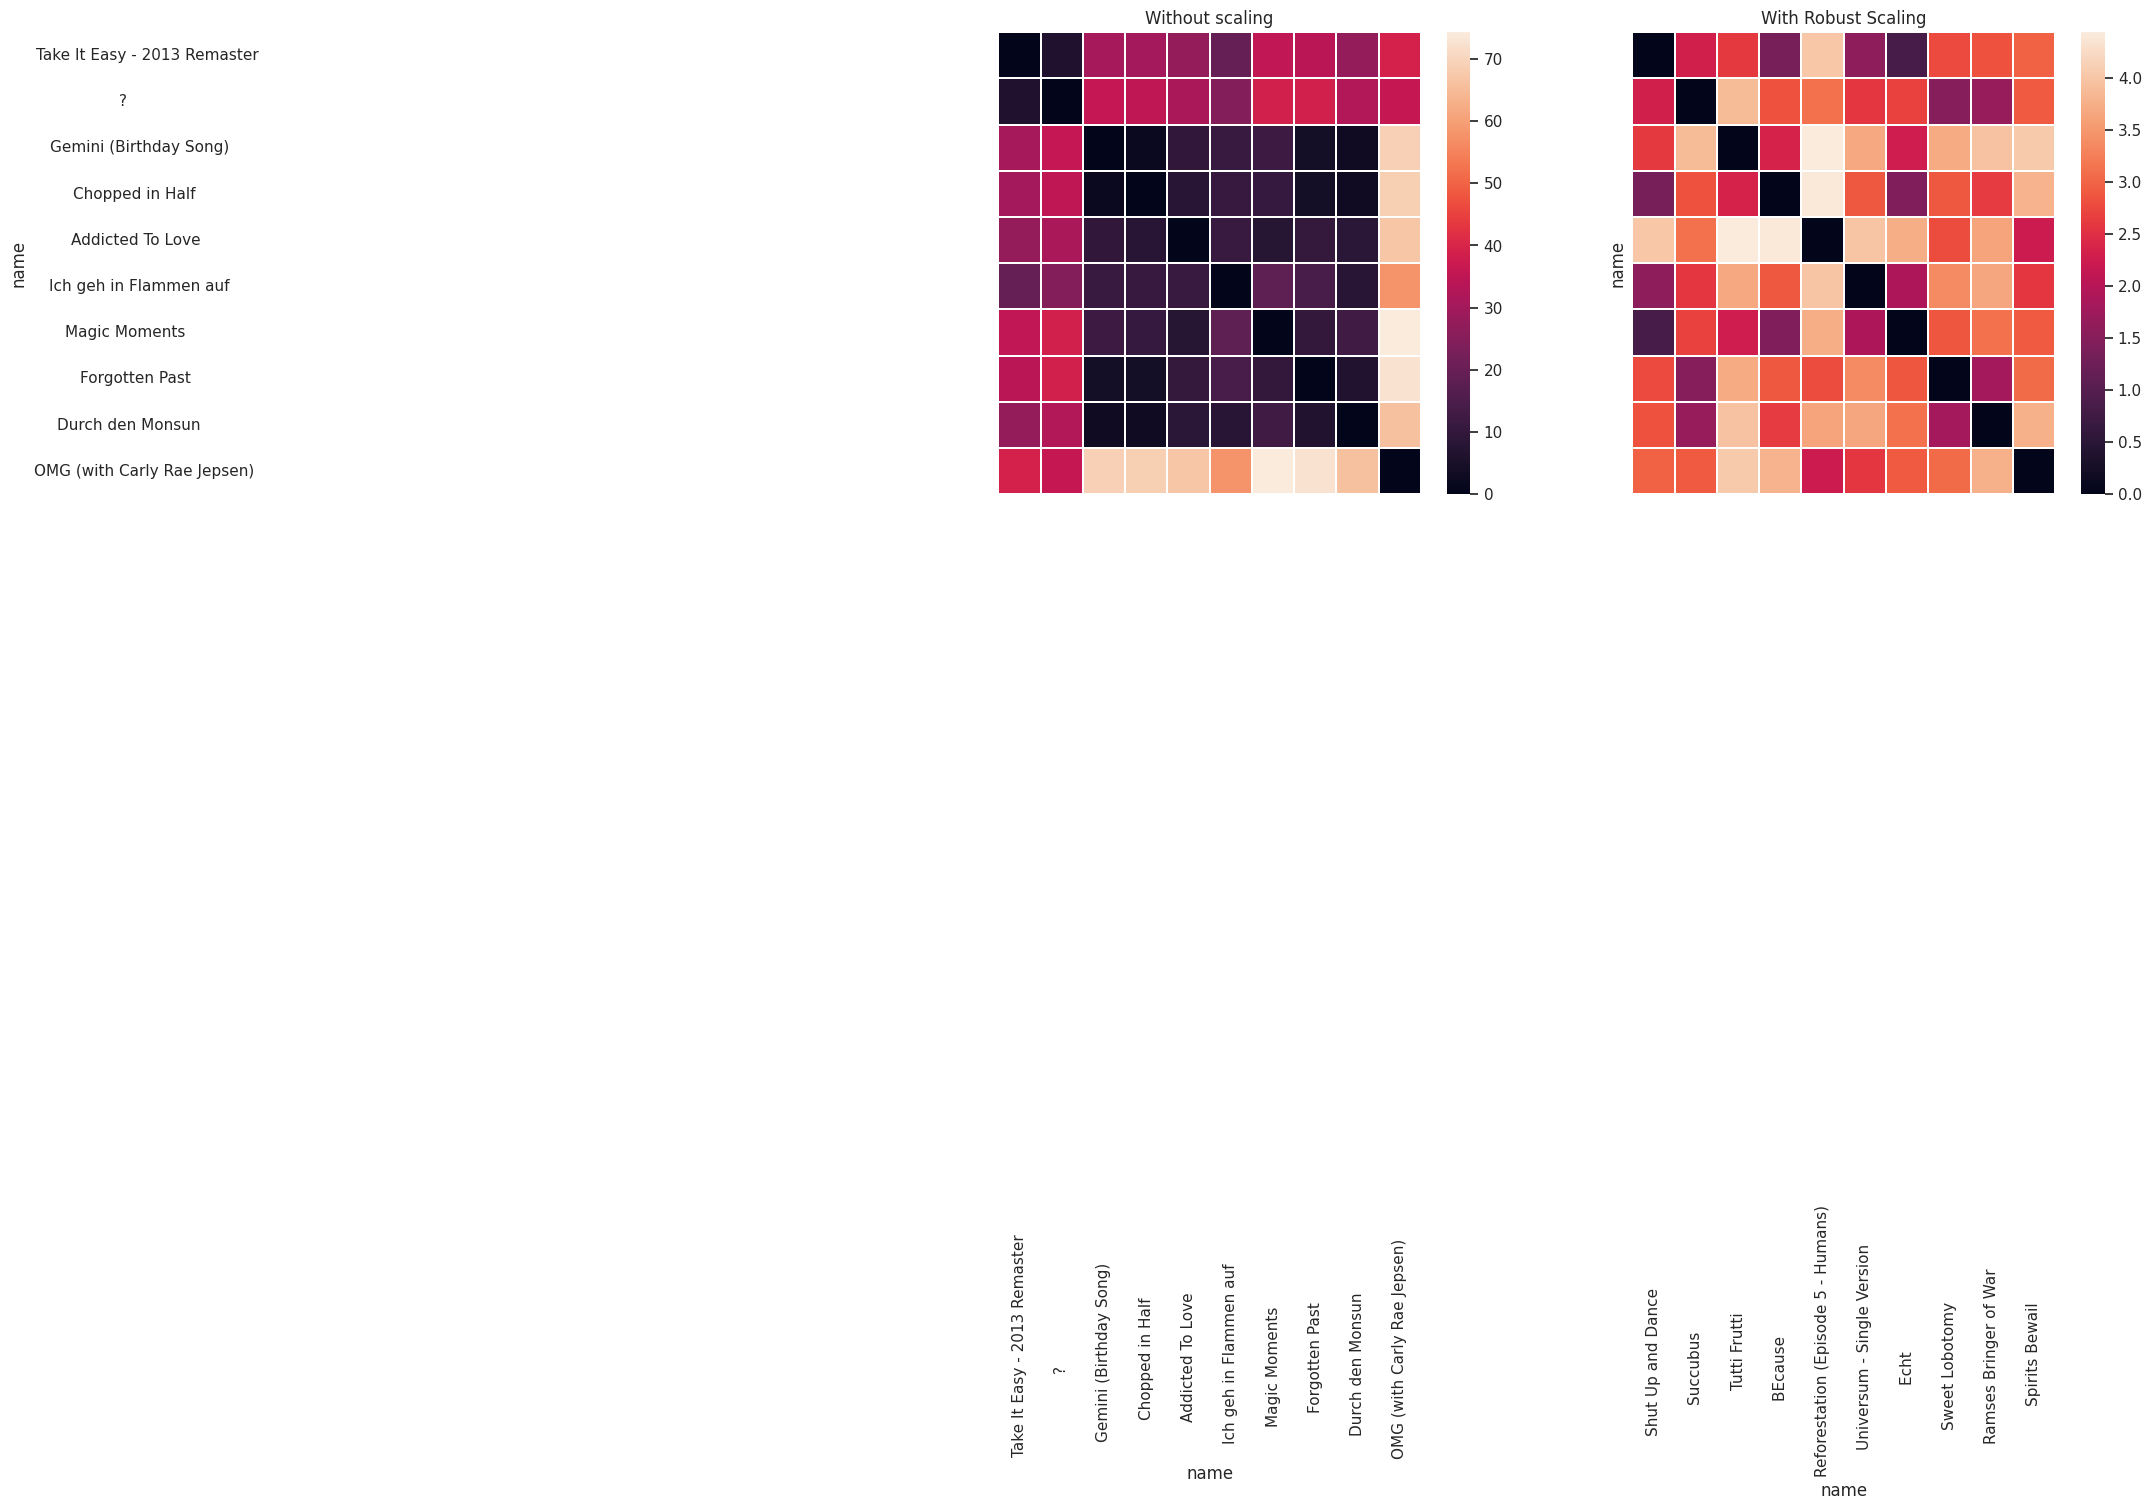

In [65]:
without_distances_df = pd.DataFrame(pairwise_distances(sample_5000),
                                index = sample_5000.index,
                                columns = sample_5000.index)


with_distances_df = pd.DataFrame(pairwise_distances(robust_sample),
                                     index = robust_sample.index,
                                     columns = robust_sample.index)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6), constrained_layout=True)

sns.heatmap(without_distances_df, ax=ax1, linewidths=.2);
sns.heatmap(with_distances_df, ax=ax2, linewidths=.2, yticklabels=False);


ax1.set_title("Without scaling")
ax2.set_title("With Robust Scaling")

plt.show()

In [27]:
standard_sample = songs_5000_std_scaled.sample(10)

/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:61: UserWarning:

constrained_layout not applied because axes sizes collapsed to zero.  Try making figure larger or axes decorations smaller.

/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:61: UserWarning:

constrained_layout not applied because axes sizes collapsed to zero.  Try making figure larger or axes decorations smaller.

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

constrained_layout not applied because axes sizes collapsed to zero.  Try making figure larger or axes decorations smaller.



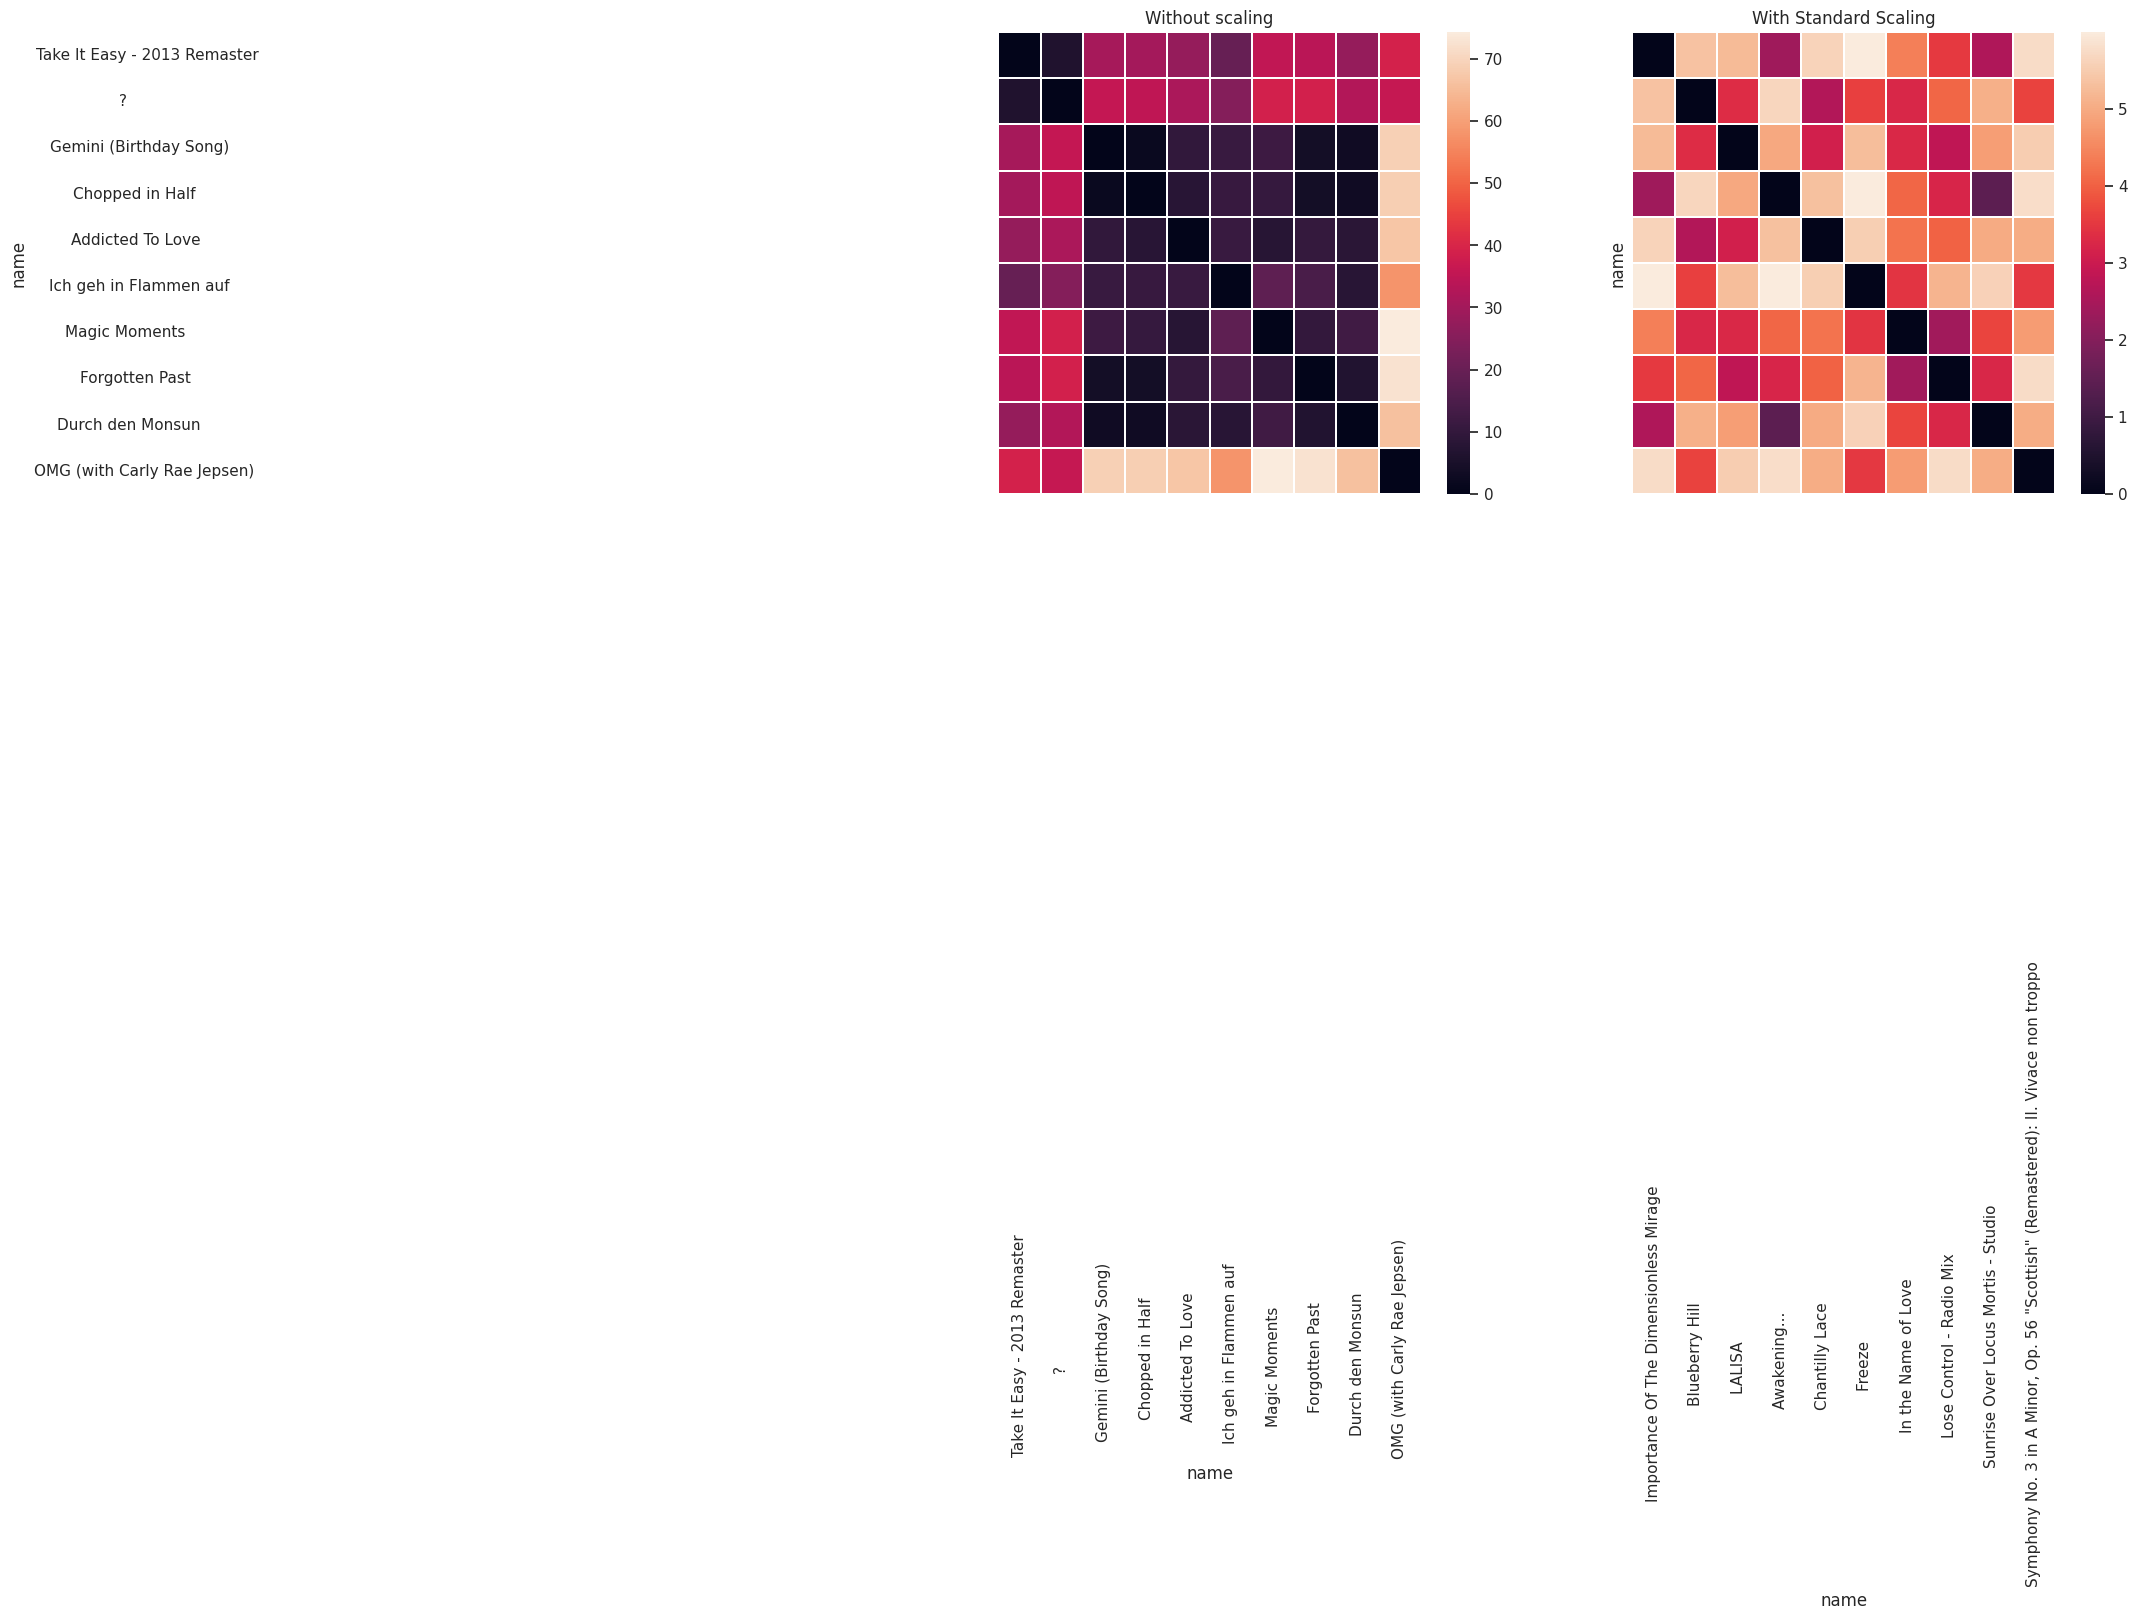

In [64]:
without_distances_df = pd.DataFrame(pairwise_distances(sample_5000),
                                index = sample_5000.index,
                                columns = sample_5000.index)


with_distances_df = pd.DataFrame(pairwise_distances(standard_sample),
                                     index = standard_sample.index,
                                     columns = standard_sample.index)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6), constrained_layout=True)

sns.heatmap(without_distances_df, ax=ax1, linewidths=.2);
sns.heatmap(with_distances_df, ax=ax2, linewidths=.2, yticklabels=False);


ax1.set_title("Without scaling")
ax2.set_title("With Standard Scaling")

plt.show()

- I select the standard scaler for further analysis

## PCA (Principle Component Analysis)

In [29]:
from sklearn.decomposition import PCA
from sklearn.datasets import make_blobs
from sklearn import set_config
set_config(transform_output="pandas")

In [30]:
pca = PCA()

pca_fit = pca.fit(songs_5000_std_scaled)

pca_basic_df = pca.transform(songs_5000_std_scaled)

pca_basic_df

,pca0,pca1,pca2,pca3,pca4,pca5,pca6,pca7
name,,,,,,,,
Se Eu Quiser Falar Com Deus,2.225003,-0.713349,-0.354084,0.878557,-0.833817,0.518241,0.317679,-0.055336
Saudade De Bahia,1.066216,-1.656373,0.410261,0.005932,0.322095,0.094580,1.120180,0.198237
Mulher Eu Sei,3.686067,-1.509089,-0.192636,0.989032,-0.217688,0.112973,0.738511,-0.087822
Rosa Morena,3.885084,-1.089112,0.375579,0.840924,-0.444656,0.079632,0.910162,-0.547520
Desafinado,3.377098,-0.233031,1.066759,1.360373,-0.450005,-0.238955,0.287696,-0.071900
...,...,...,...,...,...,...,...,...
Sinfonia: III. In ruhig fliessender Bewegung,3.682404,0.850484,-1.063542,0.580087,-0.850733,-0.810406,0.496101,-0.330801
"Elgar: Enigma Variations, Op. 36: XV. EDU (Finale)",4.236265,2.084694,-0.851718,-0.353084,0.521557,-0.399084,-0.205811,-0.005599
"Also sprach Zarathustra, Op.30, TrV 176: Prelude (Sonnenaufgang)",3.132341,2.421973,-1.086080,-0.808135,0.241893,-0.022037,-0.508303,0.628018


- Identifying the most informative principal component

In [31]:
# Get the variance explained by each principal component
explained_variance_array = pca_fit.explained_variance_ratio_

explained_variance_array

array([0.33587767, 0.28281585, 0.12375304, 0.088684  , 0.07379681,
       0.04304229, 0.03798276, 0.01404759])

### Elbow method

The elbow method works by plotting the variance of each principal component against its index.

In [32]:
pd.DataFrame(explained_variance_array, columns=["Variance explained"])

,Variance explained
0,0.335878
1,0.282816
2,0.123753
3,0.088684
4,0.073797
5,0.043042
6,0.037983
7,0.014048


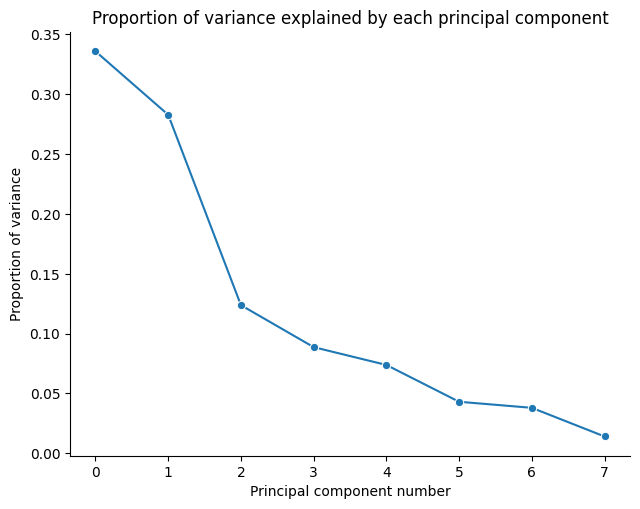

In [33]:
# Create a Pandas DataFrame from the variance explained array
explained_variance_array_df = pd.DataFrame(explained_variance_array, columns=["Variance explained"])

(
  # Create a line chart with sns.relplot
  sns.relplot(
      kind = 'line',
      data = explained_variance_array_df,
      x = explained_variance_array_df.index,
      y = "Variance explained",
      marker = 'o',
      aspect = 1.3)
  # Set the title of the plot
  .set(title = "Proportion of variance explained by each principal component")
  # Set the axis labels
  .set_axis_labels("Principal component number", "Proportion of variance")
);

Just like the elbow method used to determine the optimal number of clusters for k-means clustering, we are looking for a point where the decrease in variance levels off. This point, known as the elbow point, marks the point at which the explained variance starts to reduce significantly.

In [34]:
# Set the variable elbow to where you believe the elbow is
elbow = 5

### Cumulative explained variance

Cumulative explained variance
Cumulative explained variance (CEV) is calculated by summing the explained variance of each principal component. The CEV plot shows how much variance is explained by each principal component, as well as the cumulative variance explained by all principal components up to that point.

In [35]:
import numpy as np

In [36]:
cumulative_sum_of_variance = np.cumsum(explained_variance_array)

cumulative_sum_of_variance

array([0.33587767, 0.61869352, 0.74244656, 0.83113056, 0.90492737,
       0.94796966, 0.98595241, 1.        ])

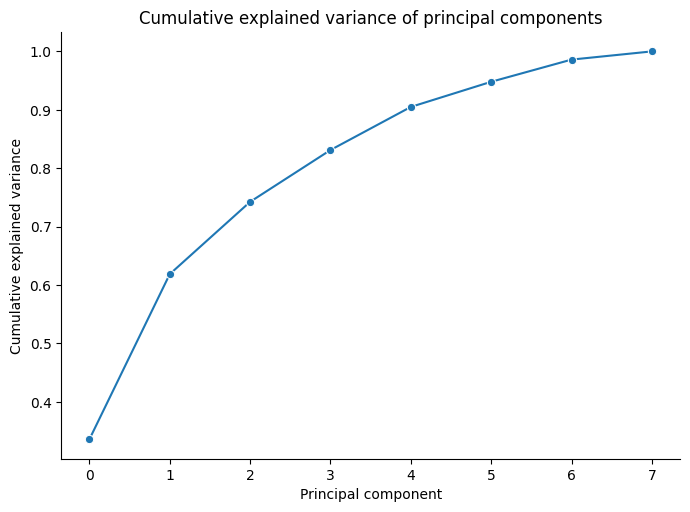

In [37]:
(
  # Create a cumulative explained variance plot
  sns.relplot(
      kind = "line",  # Create a line plot
      x = range(len(explained_variance_array)),  # Set the x-axis to be the principal component index
      y = cumulative_sum_of_variance,  # Set the y-axis to be the cumulative explained variance
      marker = "o",  # Use a circle marker for the data points
      aspect = 1.4,  # Set the aspect ratio of the plot to be 1.4
  )
  # Set the title of the plot
  .set(title = "Cumulative explained variance of principal components")
  # Set the axis labels
  .set_axis_labels("Principal component", "Cumulative explained variance")
);

We can also look for an elbow in the cumulative variance plot to determine how many principal components to retain. However, instead of doing that, we will set a cumulative variance threshold in the PCA constructor. This threshold tells scikit-learn how many principal components to retain. For example, 0.95 tells scikit-learn that we want to retain as many principle components as contain 95% or more of the variance.

- Let's visualise this threshold

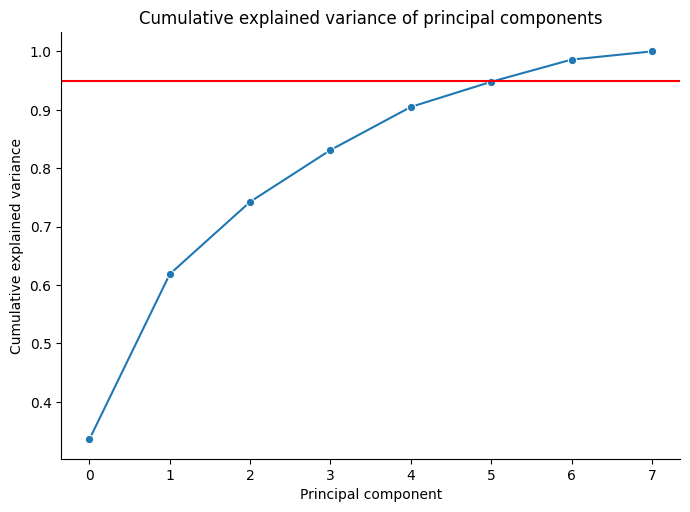

In [38]:
(
  # Create a cumulative explained variance plot
  sns.relplot(
      kind = "line",  # Create a line plot
      x = range(len(explained_variance_array)),  # Set the x-axis to be the principal component index
      y = cumulative_sum_of_variance,  # Set the y-axis to be the cumulative explained variance
      marker = "o",  # Use a circle marker for the data points
      aspect = 1.4,  # Set the aspect ratio of the plot to be 1.4
  )
  # Set the title of the plot
  .set(title="Cumulative explained variance of principal components")
  # Set the axis labels
  .set_axis_labels("Principal component", "Cumulative explained variance")
);

# Add a horizontal red line at 0.95 on the y axis
plt.axhline(y = 0.95,
            color = 'red');

- Let's apply this to our scaled data

In [39]:
from sklearn.decomposition import PCA

In [40]:
# Create a PCA object
pca_variance = PCA(n_components = 0.95)

In [41]:
# Fit the PCA object to the scaled features dataframe and transform it
pca_variance_df = pca_variance.fit_transform(songs_5000_std_scaled)

# The dataframe now contains the principal components of the scaled features dataframe
pca_variance_df

,pca0,pca1,pca2,pca3,pca4,pca5,pca6
name,,,,,,,
Se Eu Quiser Falar Com Deus,2.225003,-0.713349,-0.354084,0.878557,-0.833817,0.518241,0.317679
Saudade De Bahia,1.066216,-1.656373,0.410261,0.005932,0.322095,0.094580,1.120180
Mulher Eu Sei,3.686067,-1.509089,-0.192636,0.989032,-0.217688,0.112973,0.738511
Rosa Morena,3.885084,-1.089112,0.375579,0.840924,-0.444656,0.079632,0.910162
Desafinado,3.377098,-0.233031,1.066759,1.360373,-0.450005,-0.238955,0.287696
...,...,...,...,...,...,...,...
Sinfonia: III. In ruhig fliessender Bewegung,3.682404,0.850484,-1.063542,0.580087,-0.850733,-0.810406,0.496101
"Elgar: Enigma Variations, Op. 36: XV. EDU (Finale)",4.236265,2.084694,-0.851718,-0.353084,0.521557,-0.399084,-0.205811
"Also sprach Zarathustra, Op.30, TrV 176: Prelude (Sonnenaufgang)",3.132341,2.421973,-1.086080,-0.808135,0.241893,-0.022037,-0.508303


## Analyzing K

### Inertia & elbow method

In [42]:
# import pandas as pd

# from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# import seaborn as sns
import plotly.graph_objects as go

 Inertia and the elbow method
In clustering, inertia is a measure of how well data points fit into their assigned clusters. Lower inertia indicates a better fit. However, minimising inertia alone can lead to meaningless clusters, with each data point in its own cluster.

The elbow method is a visual aid for identifying the optimal number of clusters. It plots inertia values for different cluster numbers, revealing an "elbow" where the inertia reduction begins to plateau. This plateau indicates that reducing inertia further has little impact on cluster quality.

To find the inertia score for our clusters, we can use the KMeans attribute .inertia_.

We will cluster our song preferences data multiple times, starting with 1 cluster and increasing the number of clusters by 1 each time until we reach max_k. We will store the inertia score for each clustering in a list.

Once we've calculated the inertia scores for all values of k, we'll plot them on a line chart. We'll then look for the "elbow" in the line chart. The elbow is the point where the inertia score starts to plateau, indicating that adding more clusters is not significantly improving the quality of the clustering.

In [43]:
# Decide on a random_state to use
seed = 123

# Set the maximum number of clusters to try
max_k = 50

# Create an empty list to store the inertia scores
inertia_list = []

# Iterate over the range of cluster numbers
for i in range(1, max_k + 1):

    # Create a KMeans object with the specified number of clusters
    myKMeans = KMeans(n_clusters = i,
                      n_init = "auto",
                      random_state = seed)

    # Fit the KMeans model to the scaled data
    myKMeans.fit(pca_variance_df)

    # Append the inertia score to the list
    inertia_list.append(myKMeans.inertia_)

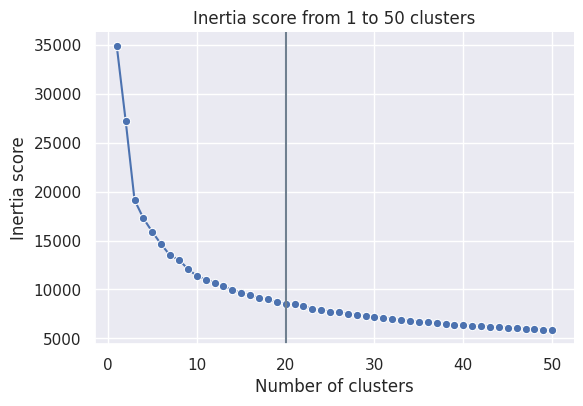

In [44]:
# Set the Seaborn theme to darkgrid
sns.set_theme(style='darkgrid')

(
# Create a line plot of the inertia scores
sns.relplot(y = inertia_list,
            x = range(1, max_k + 1),
            kind = 'line',
            marker = 'o',
            height = 4,
            aspect = 1.5)
# Set the title of the plot
.set(title=f"Inertia score from 1 to {max_k} clusters")
# Set the axis labels
.set_axis_labels("Number of clusters", "Inertia score")
);

# Add a vertical red line at 20 on the x axis for the minimum number required
plt.axvline(x = 20,
            color = 'slategrey');

### The silhouette score

The silhouette score is another metric for evaluating the quality of clustering results. It measures how well each data point is assigned to its cluster, taking into account the distance to other clusters. The silhouette score ranges from -1 to 1, with higher scores indicating better clustering.

The silhouette score can be used to identify the optimal number of clusters by clustering the data with different numbers of clusters and selecting the number of clusters that has the highest the silhouette score.

To calculate the silhouette score we'll use the SKLearn function silhouette_score.

In [45]:
# Set the maximum number of clusters to try
max_k = 50

# Create an empty list to store the silhouette scores
sil_scores = []


for j in range(2, max_k):

    # Create a KMeans object with the specified number of clusters
    kmeans = KMeans(n_clusters = j,
                    n_init = "auto",
                    random_state = seed)

    # Fit the KMeans model to the scaled data
    kmeans.fit(pca_variance_df)

    # Get the cluster labels
    labels = kmeans.labels_

    # Calculate the silhouette score
    score = silhouette_score(pca_variance_df, labels)

    # Append the silhouette score to the list
    sil_scores.append(score)

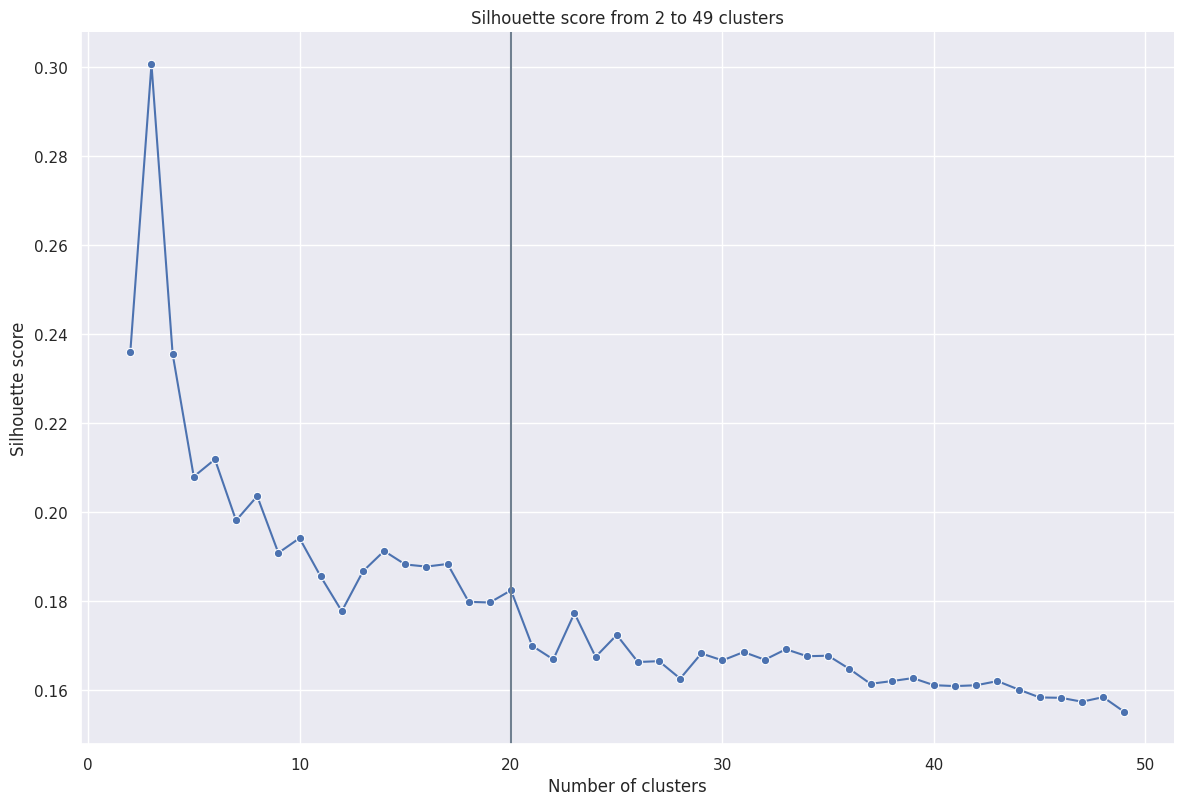

In [46]:
(
sns.relplot(y = sil_scores,
            x = range(2, max_k),
            kind = 'line',
            marker = 'o',
            height = 8,
            aspect = 1.5)
.set(title=f"Silhouette score from 2 to {max_k - 1} clusters")
.set_axis_labels("Number of clusters", "Silhouette score")
);

# Add a vertical red line at 20 on the x axis for the minimum number required
plt.axvline(x = 20,
            color = 'slategrey');

To determine the optimal number of clusters, we can look for the highest silhouette score. This score measures how well each point is assigned to its cluster, with higher scores indicating better clustering.

However, the highest silhouette score may not always be the best choice. For example, if the score is very high for a large number of clusters, it may be a sign that the clusters are too finely grained and that we are overfitting the data.

In addition, we should consider our business objectives and the data we are using. For example, if we are clustering customers based on their purchase history, we may want to choose a smaller number of clusters so that we can easily identify different customer segments.

Therefore, it's important to use the silhouette score in conjunction with other methods, such as the elbow method, and to consider our business objectives and the data we are using when choosing the optimal number of clusters.

You can also experiment with different values for random_state. It's possible that you got a "bad seed" and this is leading to misleading results. Make sure to use the same random_state for both the inertia and silhouette methods so that you are comparing the same clusters.

## Exploring the cluster means

### Column averages

By grouping the clusters and looking at the average score for each column, you can learn more about the different groups of songs.

In [47]:
# Initialise the model
my_kmeans = KMeans(n_clusters = 24, # you always choose the number of k here
                   n_init = "auto",
                   random_state = 123)

# Fit the model to the data
my_kmeans.fit(songs_5000_std_scaled)

# Obtain the cluster output
clusters = my_kmeans.labels_

# Attach the cluster output to our original DataFrame
songs_5000_std_scaled["cluster"] = clusters

In [48]:
songs_5000_std_scaled.groupby(by="cluster").mean()

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,valence,tempo
cluster,,,,,,,,
0,0.460482,0.612650,0.549990,-0.361952,-0.592941,1.554401,0.043668,0.432487
1,-0.263470,-0.446640,0.027260,-0.710708,-0.215405,-0.540749,-0.532289,0.783405
2,-0.600936,-1.943128,-2.102938,-0.583173,2.058234,1.775402,-0.970888,0.688122
3,-1.479068,0.912106,-0.029217,0.742891,-0.758411,1.543109,-0.872749,1.481412
4,0.788209,-0.459744,-0.627187,-0.637665,-0.229294,-0.542457,1.205716,-0.152775
5,0.561891,0.598102,0.784941,-0.558090,-0.552859,-0.581932,0.915007,0.325154
6,0.568051,0.204100,0.545193,-0.479506,-0.352124,-0.618082,0.306959,-0.991831
7,-0.016012,0.482446,0.492685,-0.080084,-0.185613,-0.489848,0.988589,1.889198
8,-1.146571,0.581456,-0.619602,-0.015514,-0.730945,1.651337,-0.653243,-0.449470


## Radar chart

Having calculated the average score for each song by cluster, we now have a matrix that we can analyse. However, as data scientists with coding skills, we can visualise this information to gain a clearer understanding of why certain songs are clustered together and why others aren't.

Visualising the data can help us to identify patterns and trends that would be difficult to see in a matrix. For example, we might be able to see that certain songs are consistently grouped together, while others are more spread out. This could suggest that there are different subgroups of songs with different features.

We can also use visualisation to identify outliers. For example, we might find a few songs who have very different features than the rest of the group.

In [49]:
songs_5000_std_scaled.describe()

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,valence,tempo,cluster
count,4421.000000,4.421000e+03,4.421000e+03,4.421000e+03,4.421000e+03,4.421000e+03,4.421000e+03,4.421000e+03,4421.000000
mean,0.000000,-1.028607e-16,5.143037e-17,7.714556e-17,5.143037e-17,2.571519e-17,-7.714556e-17,1.092895e-16,11.385659
std,1.000113,1.000113e+00,1.000113e+00,1.000113e+00,1.000113e+00,1.000113e+00,1.000113e+00,1.000113e+00,6.876898
min,-2.177403,-2.666485e+00,-2.951755e+00,-1.172109e+00,-7.706500e-01,-6.492951e-01,-1.621269e+00,-2.500909e+00,0.000000
25%,-0.908722,-6.173812e-01,-5.301928e-01,-7.750436e-01,-7.664577e-01,-6.492922e-01,-8.698548e-01,-7.801234e-01,5.000000
50%,0.149302,2.711298e-01,2.518378e-01,-3.544674e-01,-5.512464e-01,-6.462343e-01,-9.240305e-02,5.088167e-03,11.000000
75%,0.804044,8.358279e-01,7.370694e-01,5.101953e-01,5.512798e-01,6.657292e-01,8.574083e-01,5.200641e-01,17.000000
max,2.118272,1.230722e+00,2.318305e+00,3.148592e+00,2.274073e+00,2.105454e+00,1.909902e+00,3.507677e+00,23.000000


In [50]:
# Create an empty list to store the Scatterpolar object of each cluster
scatter_objects = []

# State the label for each arm of the chart
categories = songs_5000_std_scaled.columns

# Iterate over the unique clusters and add an object for each cluster to the list
for cluster in sorted(songs_5000_std_scaled['cluster'].unique()):

  # Find the mean value for each column of the cluster
  cluster_means = [songs_5000_std_scaled.loc[songs_5000_std_scaled["cluster"] == cluster, songs_5000_std_scaled.columns[0]].mean(),
                  songs_5000_std_scaled.loc[songs_5000_std_scaled["cluster"] == cluster, songs_5000_std_scaled.columns[1]].mean(),
                  songs_5000_std_scaled.loc[songs_5000_std_scaled["cluster"] == cluster, songs_5000_std_scaled.columns[2]].mean(),
                  songs_5000_std_scaled.loc[songs_5000_std_scaled["cluster"] == cluster, songs_5000_std_scaled.columns[3]].mean(),
                  songs_5000_std_scaled.loc[songs_5000_std_scaled["cluster"] == cluster, songs_5000_std_scaled.columns[4]].mean(),
                  songs_5000_std_scaled.loc[songs_5000_std_scaled["cluster"] == cluster, songs_5000_std_scaled.columns[5]].mean(),
                  songs_5000_std_scaled.loc[songs_5000_std_scaled["cluster"] == cluster, songs_5000_std_scaled.columns[6]].mean(),
                  songs_5000_std_scaled.loc[songs_5000_std_scaled["cluster"] == cluster, songs_5000_std_scaled.columns[7]].mean(),
                  #songs_5000_std_scaled.loc[songs_5000_std_scaled["cluster"] == cluster, songs_5000_std_scaled.columns[8]].mean()
                  ]

  # Create a Scatterpolar object for the cluster
  cluster_scatter = go.Scatterpolar(
    r = cluster_means,          # set the radial coordinates
    theta = categories,         # the names of the columns
    fill = 'toself',            # fills in the space with colour
    name = f'Cluster {cluster}' # adds the name of the cluster
  )

  # Add the Scatterpolar object to the list
  scatter_objects.append(cluster_scatter)

# Create the figure (the white area)
fig = go.Figure()

# Add the scatter objects to the figure
fig.add_traces(scatter_objects)

# Add extras to the plot, such as title
fig.update_layout(
  title_text = 'Radar chart of mean song features by cluster',
  height = 600,
  width = 800,
  polar = dict(
    radialaxis = dict(
      visible = True,      # visibility of the numbers on the arm
      range = [-3, 4]      # scale of the plot depending on the scaler
    )),
  showlegend = True
)

# Show the initialised plot and the trace objects
fig.show()

We can take sample from every cluster to check the nearness based on the features and understand if the clusters (playlists) are correct or have some misfit in them

In [57]:
cluster_10 = songs_5000_std_scaled[songs_5000_std_scaled["cluster"] == 10]
cluster_10.sample(10)

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,valence,tempo,cluster
name,,,,,,,,,
Everything I Own,-0.737920,-1.383475,-1.249090,-0.921331,1.478467,-0.649295,-0.066732,-1.514941,10
You Belong To Me,-0.709453,-2.145620,-1.534762,-0.939617,2.121071,-0.649295,-1.089888,-1.907025,10
"La Gioconda / Act 2: ""Cielo e mar""",-1.729522,-1.971867,-2.358156,-0.602633,2.240412,-0.615569,-1.433874,-1.500441,10
I'll Never Smile Again,-1.145948,-2.208803,-1.536698,-0.910882,2.102711,-0.648646,-1.410404,-2.232463,10
Chances Are - Single Version,-0.998868,-1.715186,-0.957371,-0.866473,1.974190,-0.649286,-0.616816,-1.579387,10
Não Sei,-0.657264,-2.376238,-1.408980,-0.728023,2.222052,-0.643712,-1.126561,-0.329594,10
El Partisano,-0.586096,-1.746777,-1.582899,-0.761982,2.059871,-0.625319,-0.063065,-1.362416,10
Adeus Até Mais Ver,0.111346,-1.774420,-1.728033,-1.004924,1.903810,-0.636513,-0.715831,-1.342400,10
The Nearness Of You - Remastered,-0.605074,-2.587506,-2.250999,-0.673165,2.206752,-0.646560,-1.119226,-1.271468,10


In [59]:
cluster_23 = songs_5000_std_scaled[songs_5000_std_scaled["cluster"] == 23]
cluster_23.sample(10)

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,valence,tempo,cluster
name,,,,,,,,,
Nur noch kurz die Welt retten,1.795646,-0.731900,0.440270,-0.445897,-0.085205,-0.649295,1.466168,-0.662934,23
Say You'll Be There,0.974846,-0.036887,0.489374,-0.526878,-0.725056,-0.649291,1.051771,-0.479510,23
Temperature,2.042360,-0.348853,0.862852,0.026925,-0.446288,-0.649295,1.312144,0.192166,23
Que Va,1.164627,0.547555,1.187711,-0.357080,-0.317767,-0.649295,1.345149,-1.075519,23
Cake By The Ocean,1.202583,0.298772,0.676597,-0.409325,-0.293286,-0.649295,1.642195,-0.033080,23
Einmal,1.226305,0.053938,0.510176,0.758361,-0.623157,-0.649295,1.088444,0.301527,23
I Wanna Dance with Somebody (Who Loves Me),0.894190,0.535709,-0.140750,-0.579123,-0.137225,-0.648425,1.477169,-0.039752,23
Popping,1.378129,0.606790,0.863336,0.567665,-0.731482,-0.649295,1.334148,0.024247,23
Mis Canciones Hablan de Sexo,1.544187,0.460679,0.339644,0.298601,-0.611835,-0.649295,1.341482,-1.336883,23
